In [1]:
import keras 
(x_train , y_train) ,(x_test , y_test) =  keras.datasets.cifar10.load_data()

In [2]:
print("input image shape is :" , x_train.shape)
print("output shape is" , y_train.shape)

input image shape is : (50000, 32, 32, 3)
output shape is (50000, 1)


In [3]:
from keras.utils import to_categorical

y_train_onehot = to_categorical(y_train)
y_test_onehot  = to_categorical(y_test) 

In [4]:
print("shape of the output fit for classification is :" ,y_test_onehot.shape)

shape of the output fit for classification is : (10000, 10)


In [14]:
from keras.layers import Conv2D  , Flatten , Dense  , Conv2DTranspose , Conv1DTranspose 
from keras.layers import BatchNormalization  , Concatenate , Dropout , Reshape , Conv1D , MaxPool1D
from keras.layers import MaxPooling2D  , Input  , Maximum
from keras.losses import CategoricalCrossentropy , CategoricalHinge , CategoricalFocalCrossentropy 
from keras.metrics import categorical_accuracy , categorical_focal_crossentropy , categorical_crossentropy 
from keras.regularizers import L1 , L1L2 , L2
from keras.applications import ResNet50V2
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model

In [6]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss' , patience=5)

In [7]:
gen = ImageDataGenerator(width_shift_range = 0.1 , rotation_range=10 , channel_shift_range=0.1 , zoom_range=0.1 
                         , rescale=0.1 , vertical_flip=True , horizontal_flip=True )

In [8]:
input_shape= (32,32,3)

In [31]:
input_1 = Input(shape=input_shape , name = 'input_1')

x1 = Conv2D(filters=64, kernel_size=(3 , 3) , activation='relu',padding='same',
    kernel_regularizer=L1L2(l1 = 0.05 , l2 = 0.02))(input_1)
x1 = Dropout(0.1)(x1)
x1 = Conv2DTranspose(filters = 32 ,kernel_size=(3 , 3) , activation='relu',padding='same',
    kernel_regularizer=L1L2(l1 = 0.05 , l2 = 0.02))(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)


x1 = Conv2D(filters=64 , kernel_size=(3 , 3) , activation='relu',padding='same', kernel_regularizer=L1L2(l1 = 0.05 , l2 = 0.02))(x1)
x1 = Dropout(0.1)(x1)
x1 = Conv2DTranspose(filters = 32 ,kernel_size=(3 , 3) , activation='relu',padding='same', kernel_regularizer=L1L2(l1 = 0.05 , l2 = 0.02))(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)

x1 = Conv2D(filters=64 , kernel_size=(3 , 3) , activation='relu',padding='same', kernel_regularizer=L1L2(l1 = 0.05 , l2 = 0.02))(x1)
x1 = Dropout(0.1)(x1)
x1 = Conv2DTranspose(filters = 32 ,kernel_size=(3 , 3) , activation='relu',padding='same', kernel_regularizer=L1L2(l1 = 0.05 , l2 = 0.02))(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)

x1 = Conv2D(filters=64 , kernel_size=(3 , 3) , activation='relu',padding='same', kernel_regularizer=L1L2(l1 = 0.05 , l2 = 0.02))(x1)
x1 = Dropout(0.1)(x1)
x1 = Conv2DTranspose(filters = 32 ,kernel_size=(3 , 3) , activation='relu',padding='same', kernel_regularizer=L1L2(l1 = 0.05 , l2 = 0.02))(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)

x1 = Conv2D(filters=64 , kernel_size=(3 , 3) , activation='relu',padding='same', kernel_regularizer=L1L2(l1 = 0.05 , l2 = 0.02))(x1)
x1 = Dropout(0.1)(x1)
x1 = Conv2DTranspose(filters = 32 ,kernel_size=(3 , 3) , activation='relu',padding='same', kernel_regularizer=L1L2(l1 = 0.05 , l2 = 0.02))(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)



x = Flatten()(x1) 
x = Dense(64 , activation='relu' , kernel_regularizer=L1L2(l1 = 0.05 , l2 = 0.02))(x)
x = Dropout(0.1)(x)
output = Dense(10 , activation='softmax' , kernel_regularizer=L1L2(l1=0.05 , l2=0.02))(x)
model = Model(inputs = input_1, outputs = output) # changed this line to use the correct input name
model.compile(optimizer=keras.optimizers.Adam(), loss=CategoricalCrossentropy()
, metrics=[categorical_accuracy ,categorical_focal_crossentropy , categorical_crossentropy ])
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_58 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 dropout_97 (Dropout)        (None, 32, 32, 64)        0         
                                                                 
 conv2d_transpose_50 (Conv2  (None, 32, 32, 32)        18464     
 DTranspose)                                                     
                                                                 
 batch_normalization_86 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_54 (MaxPooli  (None, 16, 16, 32)        0  

In [30]:
train_1 = model.fit(x_train , y_train_onehot , batch_size=3000 , epochs=20  ,verbose=1 ,
                     validation_data=(x_test , y_test_onehot) , callbacks=[es] )

Epoch 1/20


2023-09-06 18:32:08.145535: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - ETA: 0s - loss: 154.7124 - categorical_accuracy: 0.1262 - categorical_focal_crossentropy: 0.5176 - categorical_crossentropy: 2.4808

2023-09-06 18:32:15.762898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 11s 155ms/step - loss: 154.7124 - categorical_accuracy: 0.1262 - categorical_focal_crossentropy: 0.5176 - categorical_crossentropy: 2.4808 - val_loss: 80.3042 - val_categorical_accuracy: 0.1000 - val_categorical_focal_crossentropy: 0.4671 - val_categorical_crossentropy: 2.3054
Epoch 2/20
50/50 [==============================] - 7s 139ms/step - loss: 40.1476 - categorical_accuracy: 0.1466 - categorical_focal_crossentropy: 0.4556 - categorical_crossentropy: 2.2674 - val_loss: 14.5976 - val_categorical_accuracy: 0.1000 - val_categorical_focal_crossentropy: 0.4668 - val_categorical_crossentropy: 2.3044
Epoch 3/20
50/50 [==============================] - 7s 139ms/step - loss: 10.0193 - categorical_accuracy: 0.0995 - categorical_focal_crossentropy: 0.4665 - categorical_crossentropy: 2.3035 - val_loss: 7.0534 - val_categorical_accuracy: 0.1000 - val_categorical_focal_crossentropy: 0.4664 - val_categorical_crossentropy: 2.3030
Epoch 4/20
50/50 [========

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

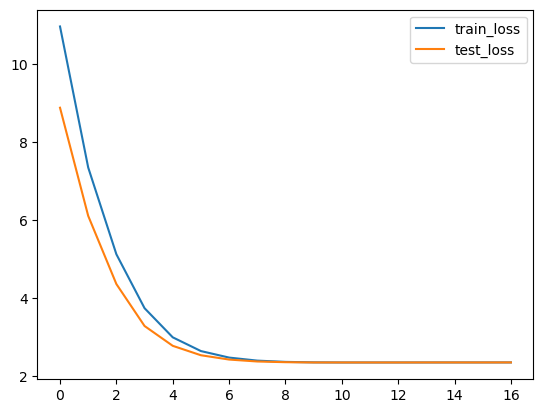

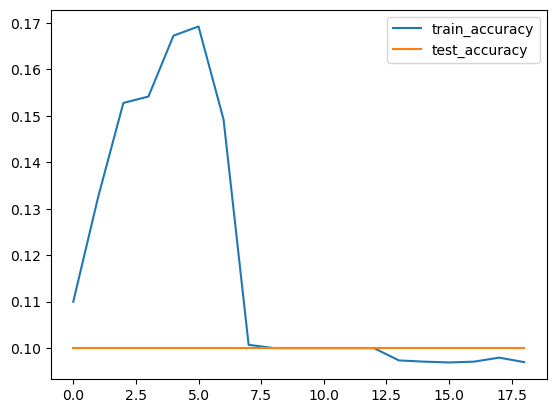

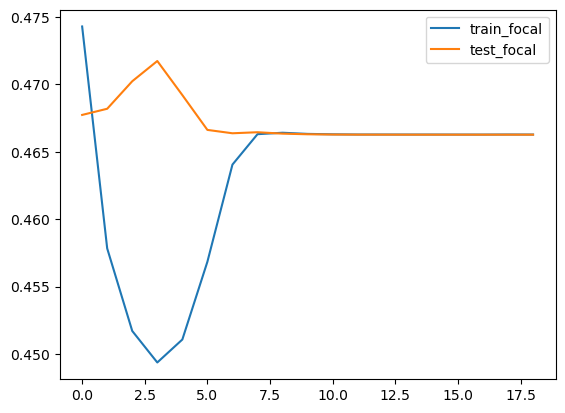

In [ ]:
plt.plot(train_1.history['loss'][2:] , label="train_loss")
plt.plot(train_1.history['val_loss'][2:] , label = "test_loss")
plt.legend()
plt.show()

plt.plot(train_1.history['categorical_accuracy'] , label="train_accuracy")
plt.plot(train_1.history['val_categorical_accuracy'] , label = "test_accuracy")
plt.legend()
plt.show()

plt.plot(train_1.history['categorical_focal_crossentropy'] , label="train_focal")
plt.plot(train_1.history['val_categorical_focal_crossentropy'] , label = "test_focal")
plt.legend()
plt.show()